In [5]:
library(csv)
library(MASS)
library(ggplot2)

In [6]:
df <- read.csv("nba_2017_nba_players_with_salary.csv")
head(df)

X,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG_PERCENT,X3P,⋯,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,⋯,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,⋯,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,⋯,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,⋯,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,⋯,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,⋯,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33


In [23]:
summary(df)
colnames(df)

df[is.na(df)] <- -1

       X                Rk                       PLAYER    POSITION 
 Min.   :  0.00   Min.   :  1.0   Bobby Portis      :  2   C   :67  
 1st Qu.: 85.25   1st Qu.:100.2   DeAndre' Bembry   :  2   PF  :70  
 Median :170.50   Median :205.5   Demetrius Jackson :  2   PF-C: 2  
 Mean   :170.50   Mean   :217.3   Deyonta Davis     :  2   PG  :70  
 3rd Qu.:255.75   3rd Qu.:327.8   Joffrey Lauvergne :  2   SF  :65  
 Max.   :341.00   Max.   :482.0   Malachi Richardson:  2   SG  :68  
                                  (Other)           :330            
      AGE              MP              FG              FGA        
 Min.   :19.00   Min.   : 2.20   Min.   : 0.000   Min.   : 0.800  
 1st Qu.:23.00   1st Qu.:15.03   1st Qu.: 1.800   1st Qu.: 4.225  
 Median :26.00   Median :21.65   Median : 3.000   Median : 6.700  
 Mean   :26.44   Mean   :21.57   Mean   : 3.484   Mean   : 7.725  
 3rd Qu.:29.00   3rd Qu.:29.07   3rd Qu.: 4.700   3rd Qu.:10.400  
 Max.   :40.00   Max.   :37.80   Max.   :10.30

[1] "X"               "Rk"              "PLAYER"          "POSITION"       
 [5] "AGE"             "MP"              "FG"              "FGA"            
 [9] "FG_PERCENT"      "X3P"             "X3PA"            "X3P_PERCENT"    
[13] "X2P"             "X2PA"            "X2P_PERCENT"     "eFG_PERCENT"    
[17] "FT"              "FTA"             "FT_PERCENT"      "ORB"            
[21] "DRB"             "TRB"             "AST"             "STL"            
[25] "BLK"             "TOV"             "PF"              "POINTS"         
[29] "TEAM"            "GP"              "MPG"             "ORPM"           
[33] "DRPM"            "RPM"             "WINS_RPM"        "PIE"            
[37] "PACE"            "W"               "SALARY_MILLIONS"

In [ ]:
ggplot(df, aes(POINTS)) +
    geom_histogram(fill='blue', colour='black') 

In [13]:
library(glmnet)
library(caret)
library(reshape2)
library(gridExtra)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13

Loading required package: lattice


In [24]:
x <- as.matrix(subset(df, select=c(AGE,
                                   MP,
                                   FG,
                                   FGA,
                                   FG_PERCENT,
                                   X3P,
                                   X3PA,
                                   X3P_PERCENT,
                                   X2P,
                                   X2PA,
                                   X2P_PERCENT,
                                   eFG_PERCENT,
                                   FT,
                                   FTA,
                                   FT_PERCENT,
                                   ORB,
                                   DRB,
                                   TRB,
                                   AST,
                                   STL,
                                   BLK,
                                   TOV,
                                   PF,
                                   POINTS,
                                   MPG,
                                   ORPM,
                                   DRPM,
                                   PACE)))


y <- as.matrix(subset(df,select=c(WINS_RPM)))

# a quick data check on the matrix
colnames(y)
colnames(x)
head(y)
head(x)

[1] "WINS_RPM"

[1] "AGE"         "MP"          "FG"          "FGA"         "FG_PERCENT" 
 [6] "X3P"         "X3PA"        "X3P_PERCENT" "X2P"         "X2PA"       
[11] "X2P_PERCENT" "eFG_PERCENT" "FT"          "FTA"         "FT_PERCENT" 
[16] "ORB"         "DRB"         "TRB"         "AST"         "STL"        
[21] "BLK"         "TOV"         "PF"          "POINTS"      "MPG"        
[26] "ORPM"        "DRPM"        "PACE"

,WINS_RPM
1,17.34
2,15.54
3,8.19
4,12.81
5,11.26
6,10.72


,AGE,MP,FG,FGA,FG_PERCENT,X3P,X3PA,X3P_PERCENT,X2P,X2PA,⋯,AST,STL,BLK,TOV,PF,POINTS,MPG,ORPM,DRPM,PACE
1,28,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,⋯,10.4,1.6,0.4,5.4,2.3,31.6,34.6,6.74,-0.47,102.31
2,27,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,⋯,11.2,1.5,0.5,5.7,2.7,29.1,36.4,6.38,-1.57,102.98
3,27,33.8,9.0,19.4,0.463,3.2,8.5,0.379,5.8,10.9,⋯,5.9,0.9,0.2,2.8,2.2,28.9,33.8,5.72,-3.89,99.84
4,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,⋯,2.1,1.3,2.2,2.4,2.2,28.0,36.1,0.45,3.90,100.19
5,26,34.2,9.0,19.9,0.452,1.8,5.0,0.361,7.2,14.8,⋯,4.6,1.4,1.3,3.7,3.9,27.0,34.2,3.56,0.64,97.11
6,26,35.9,8.8,19.8,0.444,2.9,7.7,0.370,6.0,12.1,⋯,5.9,0.9,0.3,2.6,2.0,27.0,35.9,4.63,-1.49,99.68



Call:  glmnet(x = x, y = y, alpha = 1) 

      Df   %Dev   Lambda
 [1,]  0 0.0000 3.150000
 [2,]  1 0.1122 2.870000
 [3,]  1 0.2054 2.615000
 [4,]  1 0.2827 2.383000
 [5,]  2 0.3515 2.171000
 [6,]  2 0.4261 1.978000
 [7,]  2 0.4881 1.803000
 [8,]  2 0.5395 1.643000
 [9,]  3 0.5830 1.497000
[10,]  4 0.6345 1.364000
[11,]  4 0.6810 1.243000
[12,]  4 0.7196 1.132000
[13,]  5 0.7520 1.032000
[14,]  5 0.7793 0.939900
[15,]  5 0.8019 0.856400
[16,]  5 0.8207 0.780400
[17,]  5 0.8362 0.711000
[18,]  5 0.8492 0.647900
[19,]  5 0.8599 0.590300
[20,]  7 0.8692 0.537900
[21,]  7 0.8770 0.490100
[22,]  7 0.8834 0.446500
[23,]  7 0.8887 0.406900
[24,]  8 0.8932 0.370700
[25,]  8 0.8972 0.337800
[26,]  9 0.9005 0.307800
[27,]  9 0.9032 0.280400
[28,]  9 0.9055 0.255500
[29,]  9 0.9074 0.232800
[30,]  9 0.9090 0.212100
[31,]  8 0.9103 0.193300
[32,]  8 0.9114 0.176100
[33,]  9 0.9123 0.160500
[34,]  9 0.9131 0.146200
[35,]  9 0.9137 0.133200
[36,] 11 0.9145 0.121400
[37,] 11 0.9154 0.110600
[38,] 11

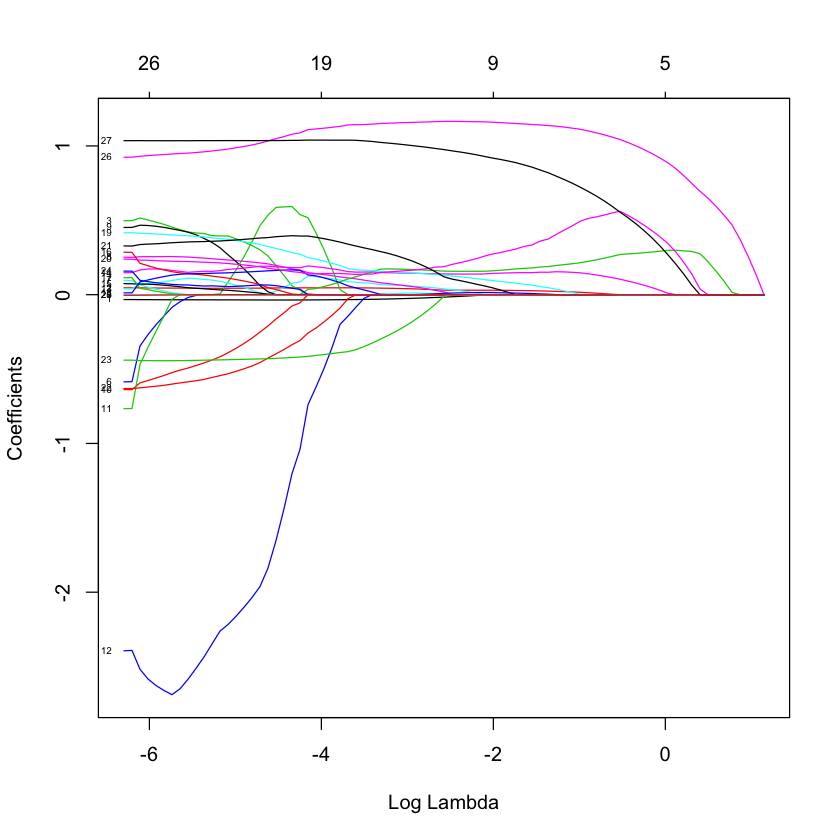

In [26]:
model.fit <- glmnet(y = y, x = x, alpha=1)

# check the fit
print(model.fit)
plot(model.fit, label = TRUE, xvar = "lambda") # plot the model coefficients and lambdas


Warning message in plot.window(...):
“"type.coef" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"type.coef" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"type.coef" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"type.coef" is not a graphical parameter”Warning message in box(...):
“"type.coef" is not a graphical parameter”Warning message in title(...):
“"type.coef" is not a graphical parameter”

ERROR: Error in nrow(x): object 'data.glmnet_x' not found


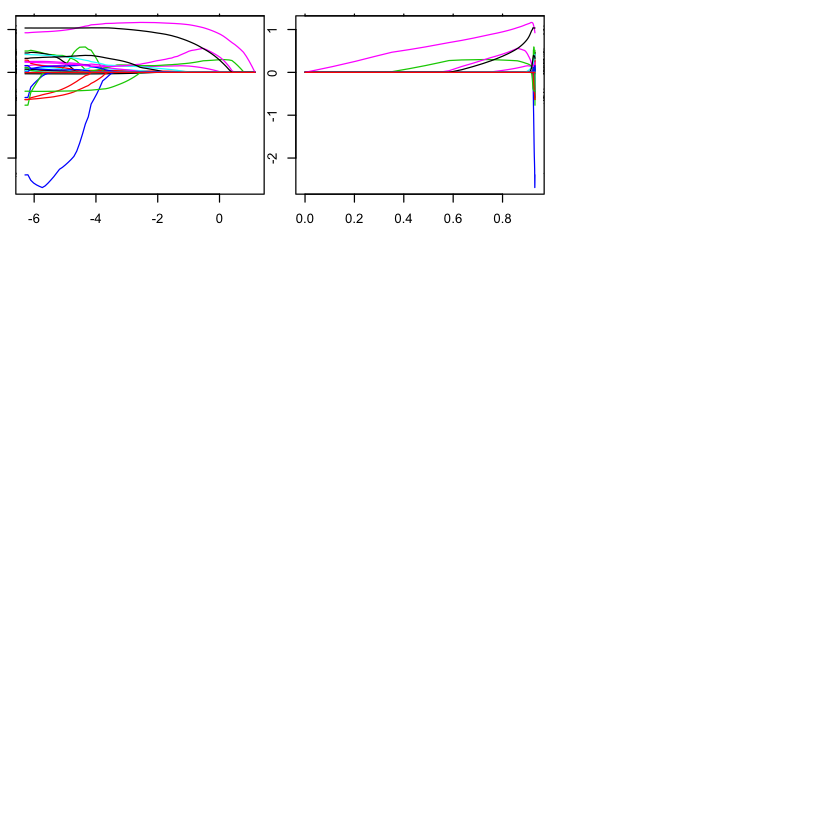

In [31]:
# print the coefficients
par(mar=c(1,1,1,1))
par(mfrow=c(4,3)); plot(model.fit, label = TRUE, xvar = "lambda")
plot(model.fit, xvar = "dev", label = TRUE)
par(mfrow=c(4,3)); plot(model.fit, xvar = "lambda", label = TRUE, type.coef = "2norm")


# cross validation / get the best fit
cvfit <- cv.glmnet(y = data.glmnet_y, x = data.glmnet_x, family="gaussian", alpha=1)
plot(cvfit)

In [32]:
df <- (data.frame(varImp(model.fit, scale = F, lambda = 0.01138))) 
df$dep_var <- rownames(df)

# makes data long
df.long <- melt(df, id.vars = c("dep_var"))

In [33]:
df.long

dep_var,variable,value
AGE,Overall,3.581415e-02
MP,Overall,4.536804e-02
FG,Overall,1.594580e-01
FGA,Overall,0.000000e+00
FG_PERCENT,Overall,0.000000e+00
X3P,Overall,0.000000e+00
X3PA,Overall,3.738729e-02
X3P_PERCENT,Overall,1.905300e-01
X2P,Overall,5.094481e-05
X2PA,Overall,1.407800e-01
